# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Importing the dataset

In [3]:
dataset = pd.read_csv('/content/Position_Salaries.csv') # Read the csv contatining data
X = dataset.iloc[:,1:-1].values # Getting 2nd column
y = dataset.iloc[:,-1].values # getting last
X.shape, y.shape #printing the shape

((10, 1), (10,))

In [4]:
y = y.reshape(-1, 1)
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

# Feature Scaling

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # for independent variables
sc2 = StandardScaler() # for dependent variable
x = sc.fit_transform(X) # Scale input values
y = sc2.fit_transform(y) # scale output values

In [6]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR #import support vector regression

#read more here: https://data-flair.training/blogs/svm-kernel-functions/
regressor = SVR(kernel = 'rbf') 

#fit the regressor
regressor.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# Predict a new result

In [11]:
prediction = regressor.predict(sc.transform([[6.5]])) # predicting on the scaled object

In [12]:
# DO the inverse transform on prediction
sc2.inverse_transform(prediction)

array([170370.0204065])

# Visualizing the SVR results

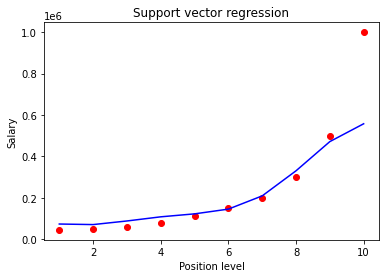

In [26]:
plt.scatter(sc.inverse_transform(x), sc2.inverse_transform(y), color = 'red')
plt.plot(sc.inverse_transform(x), sc2.inverse_transform(regressor.predict(x)), color = 'blue')
plt.title('Support vector regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

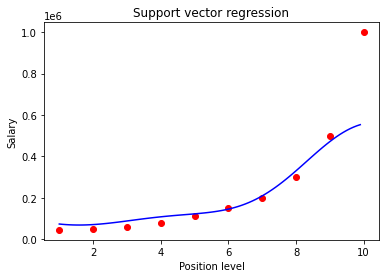

In [32]:
X_grid = np.arange(min(sc.inverse_transform(x)),
                   max(sc.inverse_transform(x)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc.inverse_transform(x), sc2.inverse_transform(y), color = 'red')

plt.plot(X_grid,
         sc2.inverse_transform(regressor.predict(sc.transform(X_grid))), 
         color = 'blue')

plt.title('Support vector regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show();

Support vector machines tends to less overfit, resulting in better performance than polynomial regression.